# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/deeplearning-az.git

Cloning into 'deeplearning-az'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 10167 (delta 35), reused 44 (delta 20), pack-reused 10096
Receiving objects: 100% (10167/10167), 236.96 MiB | 24.11 MiB/s, done.
Resolving deltas: 100% (60/60), done.
Checking out files: 100% (10110/10110), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [9]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Instalar dependendias

In [48]:
!pip install sklearn

# Instalar Theano

In [49]:
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

  Cloning git://github.com/Theano/Theano.git to /tmp/pip-req-build-cwaf9zhz
  Running command git clone -q git://github.com/Theano/Theano.git /tmp/pip-req-build-cwaf9zhz
  Created wheel for Theano: filename=Theano-1.0.5+1.geb6a4125c-cp36-none-any.whl size=2668281 sha256=16a72f1b629eac7c060fce42b066ed720b4fa7fbcd873b0fbbf0b1006755f95c
  Stored in directory: /tmp/pip-ephem-wheel-cache-tkol9apy/wheels/ae/32/7c/62beb8371953eb20c271b3bac7d0e56e1a2020d46994346b52
Successfully built Theano
  Found existing installation: Theano 1.0.5+1.geb6a4125c
    Uninstalling Theano-1.0.5+1.geb6a4125c:
      Successfully uninstalled Theano-1.0.5+1.geb6a4125c


# Instalar Tensorflow y Keras


In [50]:
!pip install keras
!pip install tensorflow

# SOM


# Cómo importar las librerías


In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importar el data set


In [52]:
dataset = pd.read_csv('/content/deeplearning-az/datasets/Part 4 - Self Organizing Maps (SOM)/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Escalado de características

In [53]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

# Entrenar el SOM

In [55]:
import sys
sys.path.append('/content/deeplearning-az/datasets/Part 4 - Self Organizing Maps (SOM)')
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

# Visualizar los resultados


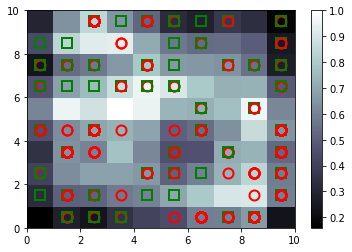

In [56]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0]+0.5, w[1]+0.5,
         markers[y[i]], markeredgecolor = colors[y[i]], markerfacecolor = 'None', 
         markersize = 10, markeredgewidth = 2)
show()

# Encontrar los fraudes

In [ ]:
mappings = som.win_map(X)
frauds = np.concatenate( (mappings[(6,1)], mappings[(7,8)]), axis = 0 )
frauds = sc.inverse_transform(frauds)